## K-Means clustering for COURSERA PROJECT
### Banknote authentication
---

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [3]:
# read Banknote.csv and stored in pandas dataframe
file_to_read="Banknote.csv"
df_banknote=pd.read_csv(file_to_read)


#### Calculate statistical measures, e.g. mean and standard deviation. 

In [4]:
df_banknote.describe() #statistical describe dataset

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [5]:
print("Dimensions:", df_banknote.shape)
print("type of dataset", df_banknote.dtypes)

Dimensions: (1372, 2)
type of dataset V1    float64
V2    float64
dtype: object


In [6]:
print ("the V1 mean:", df_banknote["V1"].mean())
print ("the standard deviation V1:" , df_banknote["V1"].std())

the V1 mean: 0.43373525728862977
the standard deviation V1: 2.8427625862451658


####normalised data with min-max method, there are negative values

In [7]:

min_data=np.min(df_banknote,0)
max_data=np.max(df_banknote,0)
normed_data=(df_banknote- min_data)/ (max_data- min_data)
normed_data.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [ ]:
data_X=df_banknote["V1"]
data_Y=df_banknote["V2"]
slope_intercept=np.polyfit(data_X, data_Y, 1)
print("If V1 and V2 have a lineal relationship, the slope and intersect are: ", slope_intercept)
print("Correlation in dataset: \n" ,df_banknote.corr())
sns.regplot(x="V1", y="V2", data=df_banknote)

```python
Correlation in dataset: 
           V1        V2
V1  1.000000  0.264026
V2  0.264026  1.000000
The correlation between V1 and V2 is week
```

Text(0, 0.5, 'V1')

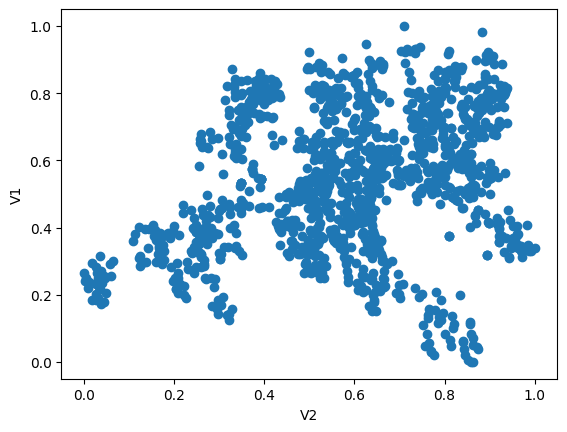

In [41]:
normed_data.sort_values("V2", inplace=True)
plt.scatter(normed_data["V2"],normed_data["V1"])
plt.xlabel("V2")
plt.ylabel("V1")

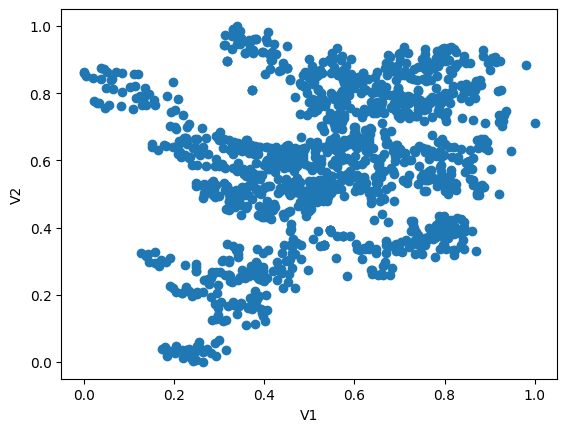

In [8]:
normed_data.sort_values("V1", inplace=True)
plt.scatter(normed_data["V1"], normed_data["V2"])
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'add_path'

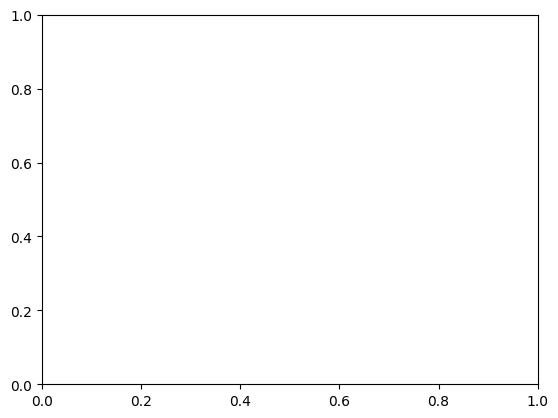

In [19]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

mean_normed_data=np.mean(normed_data,0)
std_normed_data=np.std(normed_data,0)

ellipse=patches.Ellipse([mean_normed_data[0], mean_normed_data[1]], std_normed_data[0]*2, std_normed_data[1]*2, alpha=0.25)

fig,graph_scatter=plt.subplots()
graph_scatter.add_path(ellipse)
graph_scatter.scatter(normed_data["V1"], normed_data["v2"])
graph_scatter.scatter(mean_normed_data["V1"], mean_normed_data["V2"])
graph.show()